***Hypothesis Generation***<br>
The data talks about the sales of item outlet there can be many features affecting it.<br><br>
**where the item is being sold**: i think is one of the features of course the location where the item is sold<br><br>
**item weight:** as it decreases the sales increases as most of technologies or anything aim to reduce weight<br><br>
**when was the item first introduced to the market:** The older it's the the more it sells except if it's much old<br><br>
**incase the item is food**<br><br>
**amount of calories**: most people nowadays tend to eat food with low calories




**Loading Packages and Data**




In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

df=pd.read_csv("Train.csv")


**Data structure**

In [319]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Exploratory Data Analysis**

In [320]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Looks like Item_MRP is the most important feature. it's directly proportional to the item outlet sales


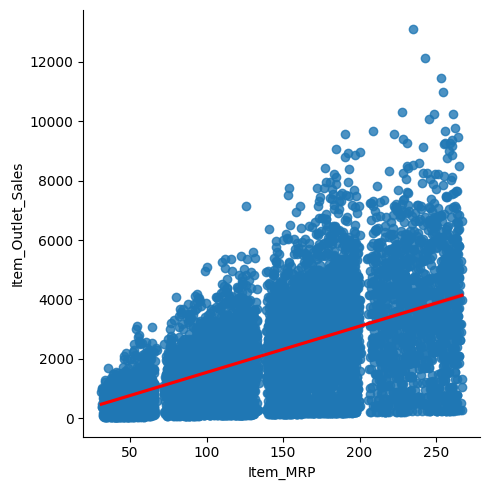

In [321]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=df,line_kws={'color': 'red'})

In [322]:
categorycol=[c for c in df.columns if df[c].dtype=='object']
numcol=[c for c in df.columns if df[c].dtype!='object']
for c in categorycol:
  print(c,'unique values :',df[c].unique())


Item_Identifier unique values : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content unique values : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type unique values : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier unique values : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size unique values : ['Medium' nan 'High' 'Small']
Outlet_Location_Type unique values : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type unique values : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Item_Fat_Content has the same category repeated 3 times but with abbreviation.let's deal with it<br>
Item_Identifier has alot of unique values we will deal with it when we know how much does it contribute to target value

In [323]:
df['Item_Fat_Content'].replace(['Low Fat', 'low fat'], 'LF', inplace=True)
df['Item_Fat_Content'].replace(['Regular'], 'reg', inplace=True)


In [324]:
df.Item_Fat_Content.unique() #check
categorycol=[c for c in df.columns if df[c].dtype=='object']
numcol=[c for c in df.columns if df[c].dtype!='object']
for c in categorycol:
  print(c,'unique values :',df[c].unique())

Item_Identifier unique values : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content unique values : ['LF' 'reg']
Item_Type unique values : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier unique values : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size unique values : ['Medium' nan 'High' 'Small']
Outlet_Location_Type unique values : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type unique values : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [325]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Alot of null values lets explore the outliers too

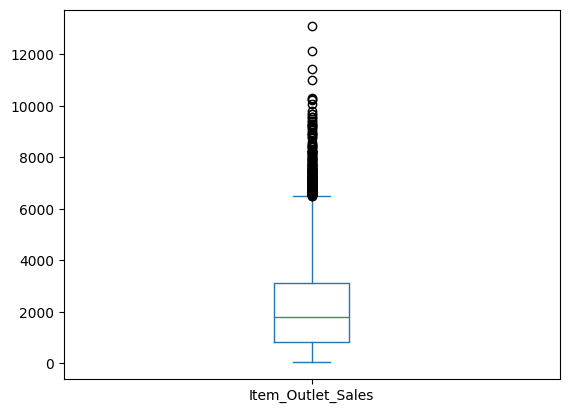

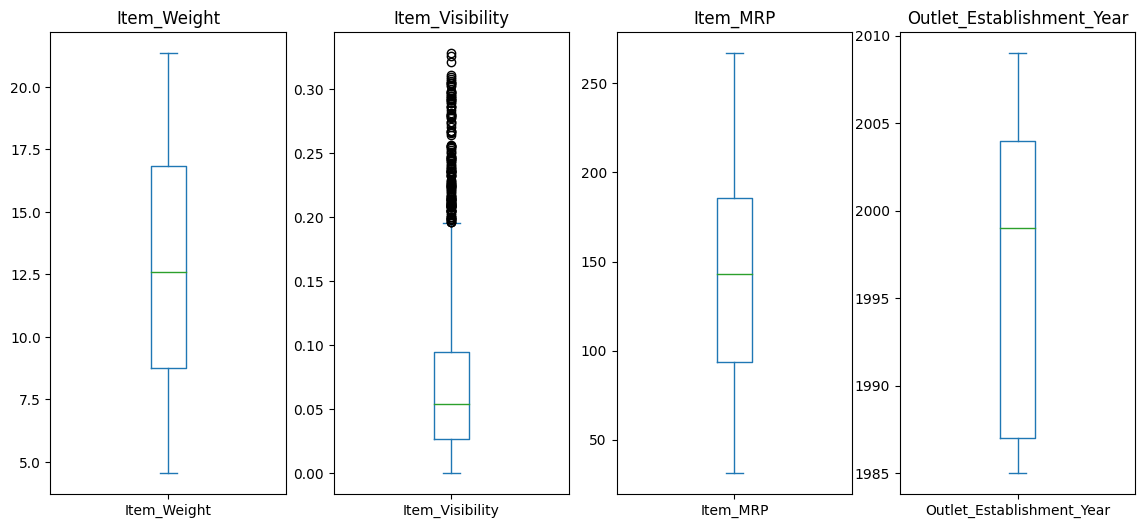

In [326]:
x=df
x1=df #making 2 copies of df to perform experiements on them later
fig, ax = plt.subplots()
df['Item_Outlet_Sales'].plot.box(ax=ax)
y=x1.Item_Outlet_Sales
x1=x1.drop("Item_Outlet_Sales",axis=1)
numcol=[c for c in x1.columns if x1[c].dtype!='object']
data=x1[numcol]
fig, ax = plt.subplots(ncols=len(data.columns),figsize=(14,6))
for i,c in enumerate(data.columns):
    data[c].plot.box(ax=ax[i])
    ax[i].set_title(c)
plt.show()

alot of outliers in item_visibility and target values we will erase some in the item_visibility but not all because they are alot so if we erased all of them we will damage the data

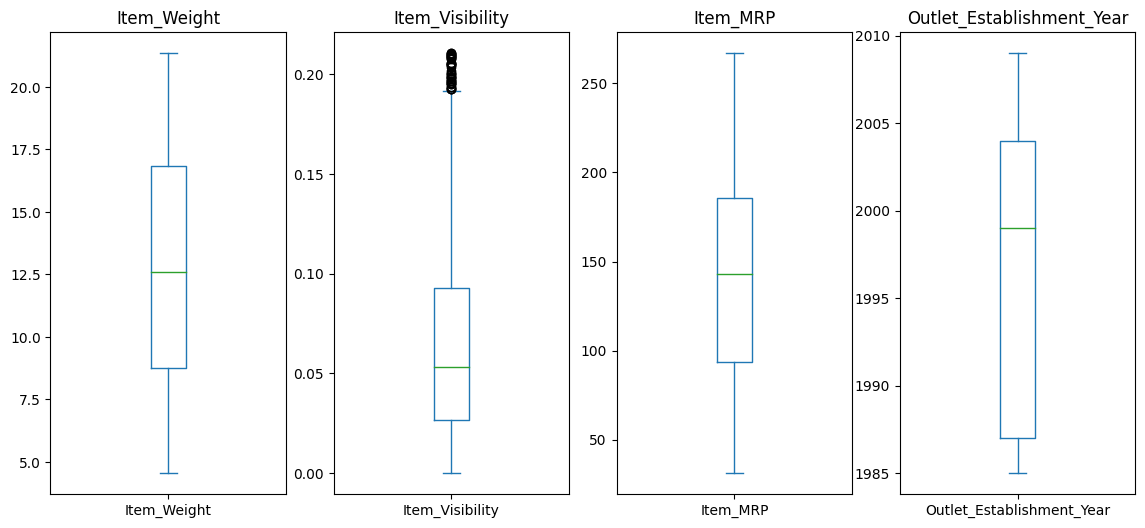

In [327]:
z=abs((data-data.mean())/data.std())  #dealing with outliers with the Zscore method
x_outliers=data[(z>=2.8).any(axis=1)].index # fine tuning the threshhold till it remove an amount of outliers which improve accuracy
x=x.drop(index=x_outliers)
data=x[numcol]
fig, ax = plt.subplots(ncols=len(data.columns),figsize=(14,6))
for i,c in enumerate(data.columns):
    data[c].plot.box(ax=ax[i])
    ax[i].set_title(c)
plt.show()

**Dealing with missing values**

In [328]:
x=x.fillna(method='bfill',axis=0).fillna(method='ffill',axis=0)
x2=x ## for an experiment later
x.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Scaling**

In [329]:
numcol=[c for c in x.columns if (x[c].dtype!='object' and c!='Item_Outlet_Sales')]
x[numcol] = minmax_scaling(x[numcol] ,columns=numcol)

In [330]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,LF,0.076199,Dairy,0.927507,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,0.081274,reg,0.091541,Soft Drinks,0.072068,OUT018,1.000000,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,0.770765,LF,0.079584,Meat,0.468288,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,0.871986,reg,0.000000,Fruits and Vegetables,0.640093,OUT010,0.541667,High,Tier 3,Grocery Store,732.3800
4,NCD19,0.260494,LF,0.000000,Household,0.095805,OUT013,0.083333,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0.137541,LF,0.269631,Snack Foods,0.777729,OUT013,0.083333,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,0.227746,reg,0.223092,Baking Goods,0.326263,OUT045,0.708333,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,0.359929,LF,0.167079,Health and Hygiene,0.228492,OUT035,0.791667,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,0.158083,reg,0.689568,Snack Foods,0.304939,OUT018,1.000000,Medium,Tier 3,Supermarket Type2,1845.5976


**Encoding**<br>
Label encoding for categorical data > 10 unique values<br>
hot encoding for categorical data < 10 unique values<br>

In [332]:
objcol=df.select_dtypes(include=['object'])
smallcol=[c for c in objcol.columns if len(objcol[c].unique())<10]
bigcol=[c for c in objcol.columns if len(objcol[c].unique())>=10]
y=x.Item_Outlet_Sales
x=x.drop("Item_Outlet_Sales",axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(x, y,train_size=0.8, test_size=0.2,random_state=0)

good_label_cols = [col for col in objcol if set(x_valid[col]).issubset(set(x_train[col]))]
bad_label_cols = list(set(objcol)-set(good_label_cols)) #badcols should be dropped to make valid ordinal encoding
x_train = x_train.drop(bad_label_cols, axis=1)
x_valid = x_valid.drop(bad_label_cols, axis=1)
ordinal_encoder = OrdinalEncoder()
x_train[good_label_cols] = ordinal_encoder.fit_transform(x_train[good_label_cols])
x_valid[good_label_cols] = ordinal_encoder.transform(x_valid[good_label_cols])

In [333]:
encode=OneHotEncoder(handle_unknown='ignore', sparse=False)
en_traincols=pd.DataFrame(encode.fit_transform(x_train[smallcol]))
en_validcols=pd.DataFrame(encode.transform(x_valid[smallcol]))
en_traincols.index=x_train.index
en_validcols.index=x_valid.index
x_train=x_train.drop(smallcol,axis=1)
x_valid=x_valid.drop(smallcol,axis=1)
en_traincols=pd.concat([x_train,en_traincols],axis=1)
en_validcols=pd.concat([x_valid,en_validcols],axis=1)
en_traincols.columns = en_traincols.columns.astype(str)
en_validcols.columns=en_validcols.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [334]:
en_traincols

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,0,1,2,3,4,5,6,7,8,9,10,11
5774,0.419470,0.684918,4.0,0.883419,9.0,0.583333,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5437,0.294433,0.114975,9.0,0.047349,5.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4756,0.931527,0.560432,0.0,0.698311,2.0,0.916667,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5411,0.580232,0.164065,0.0,0.283884,3.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4825,0.696338,0.414588,4.0,0.272714,9.0,0.583333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,0.000000,0.163142,5.0,0.345352,8.0,0.500000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7997,0.107472,0.573552,6.0,0.061189,7.0,0.708333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4921,0.785650,0.465862,8.0,0.889775,3.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3306,0.203334,0.670141,13.0,0.383352,5.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


as we can see Item_Identifier is dropped because it's a bad column and it looks like it doesn't affect the target value

**Modeling**

**Linear Regression**

In [335]:
model1 = LinearRegression().fit(en_traincols, y_train)
preds = model1.predict(en_validcols)
print('MAE:', mean_absolute_error(y_valid, preds))
yrange=y_valid.max()-y_valid.min()
error=mean_absolute_error(y_valid, preds)
print('error percentage:',(error/yrange)*100)
MdAPE = np.median(np.abs((y_valid - preds) / y_valid)) * 100
accuracy = 100 - MdAPE

print('Accuracy:', accuracy)

MAE: 826.1318727405514
error percentage: 6.836800172092292
Accuracy: 66.77403350805065


**

**XGBoost**

In [336]:
model=XGBRegressor(n_estimators=500, learning_rate=0.502,n_jobs=5)
model.fit(en_traincols,y_train ,early_stopping_rounds=3,eval_set=[(en_validcols, y_valid)], verbose=False)
preds = model.predict(en_validcols)
print('MAE:', mean_absolute_error(y_valid, preds))
yrange=y_valid.max()-y_valid.min()
error=mean_absolute_error(y_valid, preds)
print('error percentage:',(error/yrange)*100)
MdAPE = np.median(np.abs((y_valid - preds) / y_valid)) * 100
accuracy = 100 - MdAPE

print('Accuracy:', accuracy)

MAE: 748.1467443554275
error percentage: 6.191420473333838
Accuracy: 69.21359971124653


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


**RandomForest**

In [337]:
model2=RandomForestRegressor(n_estimators=80, random_state=0)
model2.fit(en_traincols, y_train)
preds = model2.predict(en_validcols)
print('MAE:', mean_absolute_error(y_valid, preds))
yrange=y_valid.max()-y_valid.min()
error=mean_absolute_error(y_valid, preds)
print('error percentage:',(error/yrange)*100)
MdAPE = np.median(np.abs((y_valid - preds) / y_valid)) * 100
accuracy = 100 - MdAPE

print('Accuracy:', accuracy)

MAE: 785.7655767821045
error percentage: 6.502741762942753
Accuracy: 68.5703758510557


**DecisionTreeRegressor**

In [338]:
model3 = DecisionTreeRegressor(max_leaf_nodes=50,random_state=1)
model3.fit(en_traincols, y_train)
preds = model1.predict(en_validcols)
print('MAE:', mean_absolute_error(y_valid, preds))
yrange=y_valid.max()-y_valid.min()
error=mean_absolute_error(y_valid, preds)
print('error percentage:',(error/yrange)*100)
MdAPE = np.median(np.abs((y_valid - preds) / y_valid)) * 100
accuracy = 100 - MdAPE

print('Accuracy:', accuracy)

MAE: 826.1318727405514
error percentage: 6.836800172092292
Accuracy: 66.77403350805065


**PermutationImportance**

In [339]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(en_validcols, y_valid)
eli5.show_weights(perm, feature_names=en_validcols.columns.tolist())

Weight,Feature
0.7500 ± 0.0556,Item_MRP
0.4108 ± 0.0499,8
0.1666 ± 0.0105,Outlet_Establishment_Year
0.0061 ± 0.0051,Item_Visibility
0.0044 ± 0.0063,Item_Weight
0.0022 ± 0.0018,9
0.0013 ± 0.0017,Outlet_Identifier
0.0011 ± 0.0011,3
0.0007 ± 0.0079,Item_Type
0.0005 ± 0.0007,6
